In [1]:
import pkg_resources
pkg_resources.get_distribution('CGRtools').version.split('.')[:2]

['4', '1']

# Стандартизация данных 

Любой массив данных собирается постепенно и часто разными людьми с разным способом представления структур органических соединений и их свойств. Поэтому всегда перед моделированием необходимо проводить стандартизацию данных для приведения к единообразному представлению.  
В качестве источника данных для практических занятий используется набор, содержащий соединения, для которых известен LogBB.  

## Стандартизация Данных с помощью CGRtools

https://cgrtools.readthedocs.io/tutorial/3_standardization.html, https://cgrtools.readthedocs.io/containers.html#CGRtools.containers.MoleculeContainer

Для MoleculeContainer доступны методы `standardize`, `kekule`, `thiele`, `neutralize`, `implicify_hydrogens` и `canonicalize`.

Метод `thiele` преобразует циклы, представленные формулами Кекуле, в ароматические представления.
Метод `standardize` применяет к молекулам правила стандартизации функциональных групп (более 50 правил). Ниже представлены некоторые из них (представлены соответствующие SMARTS): 

    • Aromatic N-Oxide 	[#7;a:1]=[O:2]>>[#7+:1]-[#8-:2]
    • Azide 			[#7;A;X2-:1][N;X2+:2]#[N;X1:3]>>[#7:1]=[N+:2]=[#7-:3]
    • Diazo  			[#6;X3-:1][N;X2+:2]#[N;X1:3]>>[#6;A:1]=[N+:2]=[#7-:3]
    • Diazonium  		[#6]-[#7:1]=[#7+:2]>>[#6][N+:1]#[N:2]
    • Iminium  		[#6;X3+:1]-[#7;X3:2]>>[#6;A:1]=[#7+:2]
    • Isocyanate  		[#7+:1][#6;A-:2]=[O:3]>>[#7:1]=[C:2]=[O:3]
    • Nitrilium  		[#6;A;X2+:1]=[#7;X2:2]>>[C:1]#[N+:2]
    • Nitro  			[O:3]=[N:1]=[O:2]>>[#8-:2]-[#7+:1]=[O:3]
    • Nitrone Nitronate 	[#6;A]=[N:1]=[O:2]>>[#8-:2]-[#7+:1]=[#6;A]
    • Nitroso  		[#6]-[#7H2+:1]-[#8;X1-:2]>>[#6]-[#7:1]=[O:2]
    • Phosphonic  		[#6][P+:1]([#8;X2])([#8;X2])[#8-:2]>>[#6][P:1]([#8])([#8])=[O:2]
    • Phosphonium Ylide  	[#6][P-:1]([#6])([#6])[#6+:2]>>[#6][P:1]([#6])([#6])=[#6;A:2]
    • Selenite  		[#8;X2][Se+:1]([#8;X2])[#8-:2]>>[#8][Se:1]([#8])=[O:2]
    • Silicate  		[#8;X2]-[#14+:1](-[#8;X2])-[#8-:2]>>[#8]-[#14:1](-[#8])=[O:2]
    • Sulfine  		[#6]-[#6](-[#6])=[S+:1][#8-:2]>>[#6]-[#6](-[#6])=[S:1]=[O:2]
    • Sulfon  			[#6][S;X3+:1]([#6])[#8-:2]>>[#6][S:1]([#6])=[O:2]
    • Sulfonium Ylide  	[#6][S-:1]([#6])[#6+:2]>>[#6][S:1]([#6])=[#6;A:2]
    • Sulfoxide  		[#6][S+:1]([#6])([#8-:2])=O>>[#6][S:1]([#6])(=[O:2])=O
    • Sulfoxonium Ylide  	[#6][S+:1]([#6])([#8-:2])=[#6;A]>>[#6][S:1]([#6])(=[#6;A])=[O:2]
    • Tertiary N-Oxide  	[#6]-[#7;X4:1]=[O:2]>>[#6]-[#7+:1]-[#8-:2]
    
Метод `canonicalize` применяет набор методов: `neutralize`, `standardize`, `kekule`, `implicify_hydrogens`, `thiele`.

In [2]:
from CGRtools.files import SDFRead
from collections import defaultdict

Прочитаем данные из файла и посмотрим их структуры.

In [3]:
with SDFRead('data/raw.sdf') as f:
    data = f.read()

In [4]:
data[0]  # поменяйте индекс для просмотра следующей структуры

In [5]:
data[1]

Визуально одинаковые структуры оказываются разными для компьютера, поскольку имеют разные порядки одинарных и двойных связей. Сравнить структуры можно оператором равенства.

In [6]:
data[0] == data[1]

False

Одна из причин - это разная форма записи групп атомов. Чаще всего проблемы связаны с азотом.

In [7]:
for x in data:
    x.standardize()  # приведем группы к стандартному виду; метод возвращает True, если была стандартизована хотя бы одна группа

In [8]:
data[0]

In [9]:
data[1]

In [10]:
data[0] == data[1]

False

Вторая причина - представление ароматических соединений с помощью формулы Кекуле. Поэтому удобней ароматические кольца кодировать "ароматическими" связями.

In [11]:
for x in data:
    x.thiele()  # преобразуем ароматические кольца

Теперь молекулы воспринимаются как идентичные.

In [12]:
data[0] == data[1]

True

In [13]:
data[0]

In [14]:
data[1]

Ниже приведен полный набор операций, необходимый для стандартизации структур.

In [15]:
data = []
with SDFRead('data/logBB.sdf') as f:
    for molecule in f:
        molecule.standardize()  # стандартизация групп атомов
        molecule.kekule()  # приведение в структуры Кекуле для исправления некорректно ароматизованных колец
        molecule.implicify_hydrogens()  # удаление явно указанных атомов водорода
        molecule.thiele()  # приведение колец в ароматическую форму
        data.append(molecule)

In [16]:
data2 = []
with SDFRead('data/logBB.sdf') as f:
    for molecule in f:
        molecule.canonicalize()

In [17]:
dif = []
for a, b in zip(data, data2):
    if a != b:
        dif.append((a, b))
        print(a, b)

Другие полезные для стандартизации функции (https://cgrtools.readthedocs.io/containers.html):

check_thiele()  
check_valence()  
clean_isotopes()  
clean_stereo()  
connected_components()  
neutralize()  
remove_hydrogen_bonds()  

## Стандартизация свойств

Моделируемые свойства в наборе данных могут содержать ошибки.  
Для численных значений могут быть приведены неправильные знаки, неправильные разделители дробной части, опечатки в числах, ошибки порядка величины и т.д. Также ошибки могут быть скрыты в некачественных экспериментах. Первым делом в наборе данных после стандартизации структур необходимо найти дубликаты. Для нахождения дубликатов необходимо собрать значения моделируемого свойства.

In [18]:
len(data), len(set(data))

(324, 321)

In [19]:
data[0].meta  # словарь, содержащий моделируемое свойство

{'name': 'methylchloroform', 'logBB': '0.4', 'logBB_class': '1', 'HAC': '5'}

Собрав списки значений измеренного свойства (в данном случае проницаемость через гематоэнцефалический барьер) для каждой молекулы, можем проанализировать наличие повторных измерений.

In [20]:
values = defaultdict(list)
for x in data:
    values[x].append(float(x.meta['logBB']))

doubles = []
unique = []
for x, y in values.items():
    if len(y) > 1:
        print(x, y)
        doubles.append(x)
    else:
        unique.append((x, y[0]))

ClC(Cl)(Cl)C [0.4, 1.4, 0.5]
c1c(nccc1)CCNC [-0.34, -0.81]


In [21]:
doubles[0]

In [22]:
doubles[1]

В данном наборе обнаружены дубликаты для двух молекул. Видно, что значения свойства для них разнятся. Для первого дубликата можно предположить, что значение 1.4 является вылетом (outlier). Для второго это сделать не удастся.  
Поэтому существуют 3 стратегии работы: 
* выбрасывать целиком структуру, если значения разнятся слишком сильно;
* выбрасывать вылетающие значения, если имеется достаточное число измерений, и усреднить оставшиеся;
* усреднять значения.

In [23]:
# в первом дубликате явно виден вылет, убрав который можно сделать усреднение.
# второй дубликат имеет ненадежные значения. Лучше его выбросить из набора
unique.append((doubles[0], .45))  

Проведя стандартизацию данных, можем подготовить списки структур и свойств для дальнейшего моделирования.

In [24]:
X = [x for x, _ in unique]
Y = [x for _, x in unique]

In [25]:
X[0]

In [26]:
Y[0]

-0.1

## Стандартизация с помощью RDkit

При выполнении функции "чтения" молекулы по умолчанию выполняется операция «дезинфекции» (**sanitization**) данной молекулы. Идея состоит в том, чтобы генерировать полезные вычисляемые свойства (например, гибридизацию, участие в кольце и т. д.) для остальной части кода и гарантировать, что молекулы «разумны»: они могут быть представлены точечными структурами Льюиса.

Ниже представлены этапы обработки молекулы:
<ol><li> <b>clearComputedProps</b>: удаляет любые расчетные свойства, которые уже существуют для молекулы и ее атомов и связей. Этот шаг выполняется всегда.</li>
<li><b>cleanUp</b>: стандартизирует некоторые нестандартные состояния валентности. 
Операции очистки:

<ul><li>           Нейтральные 5-валентные атомы N с двойными связями с атомами O преобразуются в цвиттерионную форму. Пример: N (= O) = O -> [N +] (= O) O-]</li>
               <li> Нейтральные 5-валентные атомы N с тройными связями с другими N преобразуются в цвиттерионную форму. Пример: C-N = N # N -> C-N = [N +] = [N-]</li>
                <li>Нейтральный 5-валентный фосфор с одной двойной связью с O и другой либо с C, либо с P преобразуется в цвиттерионную форму. Пример: C = P (= O) O -> C = [P +] ([O -]) O</li>
               <li> Нейтральный Cl, Br или I с исключительно O соседями и валентностью 3, 5 или 7 превращаются в цвиттерионную форму. Это включая такие вещества, как хлорная кислота, хлорная кислота и перхлорная кислота. Пример: O = Cl (= O) O -> [O -] [Cl + 2] [O-] O</li>
Этот шаг не должен генерировать исключения.</ul>

<li>        <b>updatePropertyCache</b>: вычисляет явные и неявные валентности для всех атомов. Это порождает исключения для атомов в более высоких разрешенных валентных состояниях. Этот шаг всегда выполняется, но если он «пропущен», тест на нестандартные валентности не будет выполнен.</li>

<li>        <b>symrizeSSSR</b>: вызывает алгоритм наименьшего числа симметризованных алгоритмов наименьших колец.</li>

<li>        <b>Kekulize</b>: превращает ароматические кольца в их форму Кекуле. Возбуждает исключение, если кольцо не может быть подвергнуто преобразованию в форму Кекуле или если ароматические связи найдены вне колец.</li>

<li>        <b>assignRadicals</b>: определяет количество радикальных электронов (если они есть) на каждом атоме.</li>

<li>        <b>setAromaticity</b>: идентифицирует ароматические кольца и системы колец, устанавливает ароматический флаг на атомах и связях, преобразует порядок связей в ароматический.</li>
<li>
        <b>setConjugation</b>: идентифицирует, какие связи сопряжены</li>

<li>        <b>setHybridization</b>: вычисляет состояние гибридизации каждого атома</li>

<li>        <b>cleanupChirality</b>: удаляет хиральные метки из атомов, которые не находятся в состоянии sp3 гибридизации.</li>

<li>        <b>adjustHs</b>: добавляет явные атомы водорода, где необходимо, например, для гетероатомов в ароматических кольцах. Классическим примером является атом азота в пирроле.</li></ol>

Отдельные шаги можно включать или отключать при вызове **_MolOps :: sanitizeMol_** или **_Chem.SanitizeMol_**.

Источник: http://www.rdkit.org/docs/RDKit_Book.html#molecular-sanitization

В случае, если необходимо прочитать молекулу без осуществления автоматической стандартизации, следует использовать флаг sanitize=False.  
Пример:

In [27]:
from rdkit import Chem

In [28]:
m = Chem.MolFromSmiles('Cn(:o):o')

[23:57:59] non-ring atom 1 marked aromatic


In [29]:
m

In [30]:
m = Chem.MolFromSmiles('Cn(:o):o', sanitize=False)

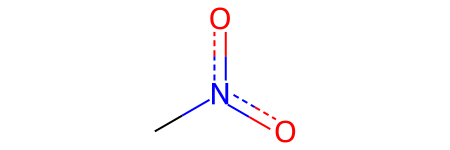

In [31]:
m

In [32]:
m = Chem.MolFromSmiles('CN(C)(C)C', sanitize=False)
problems = Chem.DetectChemistryProblems(m)
print(len(problems))

1


[23:57:59] Explicit valence for atom # 1 N, 4, is greater than permitted


In [33]:
problems

(<rdkit.Chem.rdchem._cppAtomValenceException at 0x1842de54c80>,)

In [34]:
print(len(problems))
print(problems[0].Message())
     

1
Explicit valence for atom # 1 N, 4, is greater than permitted


-------

# Стандартизация молекул с помощью RDKit




In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, SDWriter, SaltRemover
from rdkit.Chem.MolStandardize import rdMolStandardize

def standardize_molecule(mol):
    if mol is None:
        return None

    try:
        # Удаление солей
        remover = SaltRemover.SaltRemover()
        mol = remover.StripMol(mol, dontRemoveEverything=True)

        # Нейтрализация зарядов
        uncharger = rdMolStandardize.Uncharger()
        mol = uncharger.uncharge(mol)

        # Приведение к родительскому фрагменту
        parent = rdMolStandardize.FragmentParent(mol)
        mol = parent

        # Приведение к стандартной таутомерной форме
        tautomer_enumerator = rdMolStandardize.TautomerEnumerator()
        mol = tautomer_enumerator.Canonicalize(mol)

        # Удаление стереохимии
        Chem.RemoveStereochemistry(mol)

        # Сброс изотопов
        for atom in mol.GetAtoms():
            atom.SetIsotope(0)

        # Канонизация SMILES
        mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol, canonical=True))

        # Добавление и удаление гидрогенов
        mol = Chem.AddHs(mol)
        mol = Chem.RemoveHs(mol)

        # Исправление металлов
        metal_disconnector = rdMolStandardize.MetalDisconnector()
        mol = metal_disconnector.Disconnect(mol)

    except Exception as e:
        print(f"Ошибка обработки молекулы: {e}")
        return None

    return mol

def process_sdf(input_file, output_file):
    suppl = Chem.SDMolSupplier(input_file)
    writer = SDWriter(output_file)

    for mol in suppl:
        if mol is None:
            continue

        standardized_mol = standardize_molecule(mol)
        if standardized_mol:
            writer.write(standardized_mol)

In [41]:
process_sdf("data/DataCuration.sdf", "standardized_DataCuration.sdf")

[00:57:40] Running Uncharger
[00:57:40] Initializing MetalDisconnector
[00:57:40] Running MetalDisconnector
[00:57:40] Initializing Normalizer
[00:57:40] Running Normalizer
[00:57:40] Running LargestFragmentChooser
[00:57:40] Initializing MetalDisconnector
[00:57:40] Running MetalDisconnector
[00:57:40] Running Uncharger
[00:57:40] Initializing MetalDisconnector
[00:57:40] Running MetalDisconnector
[00:57:40] Initializing Normalizer
[00:57:40] Running Normalizer
[00:57:40] Running LargestFragmentChooser
[00:57:40] Initializing MetalDisconnector
[00:57:40] Running MetalDisconnector
[00:57:40] Running Uncharger
[00:57:40] Initializing MetalDisconnector
[00:57:40] Running MetalDisconnector
[00:57:40] Initializing Normalizer
[00:57:40] Running Normalizer
[00:57:40] Running LargestFragmentChooser
[00:57:40] Initializing MetalDisconnector
[00:57:40] Running MetalDisconnector
[00:57:40] Running Uncharger
[00:57:40] Initializing MetalDisconnector
[00:57:40] Running MetalDisconnector
[00:57:40]

Error: Invariant Violation
	could not find atom1
	Violation occurred on line 222 in file Code\GraphMol\Canon.cpp
	Failed Expression: firstFromAtom1
	RDKIT: 2024.03.6
	BOOST: 1_85



[00:57:45] Running Uncharger
[00:57:45] Initializing MetalDisconnector
[00:57:45] Running MetalDisconnector
[00:57:45] Initializing Normalizer
[00:57:45] Running Normalizer
[00:57:45] Running LargestFragmentChooser
[00:57:45] Initializing MetalDisconnector
[00:57:45] Running MetalDisconnector
[00:57:45] Running Uncharger
[00:57:45] Initializing MetalDisconnector
[00:57:45] Running MetalDisconnector
[00:57:45] Initializing Normalizer
[00:57:45] Running Normalizer
[00:57:45] Running LargestFragmentChooser
[00:57:45] Initializing MetalDisconnector
[00:57:45] Running MetalDisconnector
[00:57:45] Running Uncharger
[00:57:45] Initializing MetalDisconnector
[00:57:45] Running MetalDisconnector
[00:57:45] Initializing Normalizer
[00:57:45] Running Normalizer
[00:57:45] Running LargestFragmentChooser
[00:57:45] Initializing MetalDisconnector
[00:57:45] Running MetalDisconnector
[00:57:45] Running Uncharger
[00:57:45] Initializing MetalDisconnector
[00:57:45] Running MetalDisconnector
[00:57:45]

Error: Invariant Violation
	could not find atom1
	Violation occurred on line 222 in file Code\GraphMol\Canon.cpp
	Failed Expression: firstFromAtom1
	RDKIT: 2024.03.6
	BOOST: 1_85



[00:57:47] Running Uncharger
[00:57:47] Initializing MetalDisconnector
[00:57:47] Running MetalDisconnector
[00:57:47] Initializing Normalizer
[00:57:47] Running Normalizer
[00:57:47] Running LargestFragmentChooser
[00:57:47] Initializing MetalDisconnector
[00:57:47] Running MetalDisconnector
[00:57:47] Running Uncharger
[00:57:47] Initializing MetalDisconnector
[00:57:47] Running MetalDisconnector
[00:57:47] Initializing Normalizer
[00:57:47] Running Normalizer
[00:57:47] Running LargestFragmentChooser
[00:57:47] Initializing MetalDisconnector
[00:57:47] Running MetalDisconnector
[00:57:47] Running Uncharger
[00:57:47] Initializing MetalDisconnector
[00:57:47] Running MetalDisconnector
[00:57:47] Initializing Normalizer
[00:57:47] Running Normalizer
[00:57:47] Running LargestFragmentChooser
[00:57:47] Initializing MetalDisconnector
[00:57:47] Running MetalDisconnector
[00:57:47] Running Uncharger
[00:57:47] Initializing MetalDisconnector
[00:57:47] Running MetalDisconnector
[00:57:47]

In [42]:
process_sdf("data/logBB.sdf", "standardized_logBB.sdf")

[00:57:49] Running Uncharger
[00:57:49] Initializing MetalDisconnector
[00:57:49] Running MetalDisconnector
[00:57:49] Initializing Normalizer
[00:57:49] Running Normalizer
[00:57:49] Running LargestFragmentChooser
[00:57:49] Initializing MetalDisconnector
[00:57:49] Running MetalDisconnector
[00:57:49] Running Uncharger
[00:57:49] Initializing MetalDisconnector
[00:57:49] Running MetalDisconnector
[00:57:49] Initializing Normalizer
[00:57:49] Running Normalizer
[00:57:49] Running LargestFragmentChooser
[00:57:49] Initializing MetalDisconnector
[00:57:49] Running MetalDisconnector
[00:57:49] Running Uncharger
[00:57:49] Initializing MetalDisconnector
[00:57:49] Running MetalDisconnector
[00:57:49] Initializing Normalizer
[00:57:49] Running Normalizer
[00:57:49] Running LargestFragmentChooser
[00:57:49] Initializing MetalDisconnector
[00:57:49] Running MetalDisconnector
[00:57:49] Running Uncharger
[00:57:49] Initializing MetalDisconnector
[00:57:49] Running MetalDisconnector
[00:57:49]

In [43]:
# Посмотрим на первые 7 молекул из исходных файлов и стандартизированных
molecules = Chem.SDMolSupplier("data/logBB.sdf")

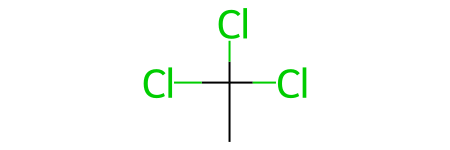

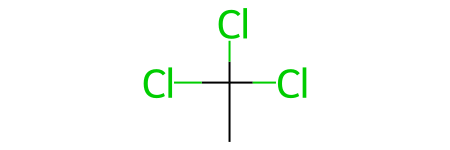

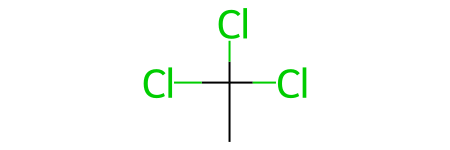

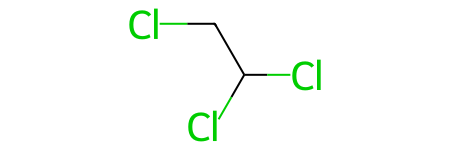

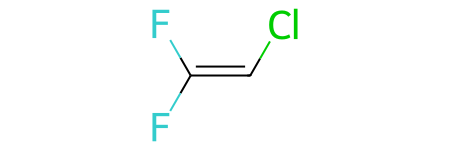

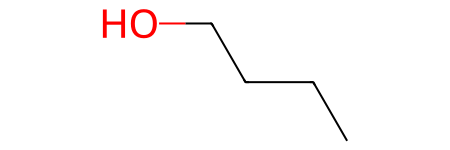

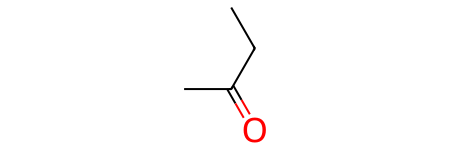

In [49]:
for i in range(7):
    display(molecules[i])

In [50]:
standardize_molecules = Chem.SDMolSupplier("standardized_logBB.sdf")

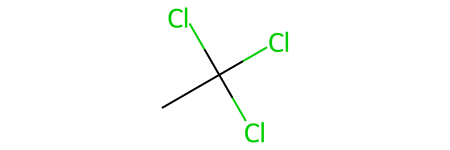

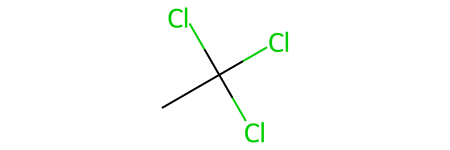

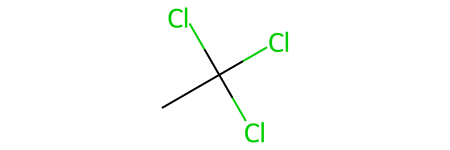

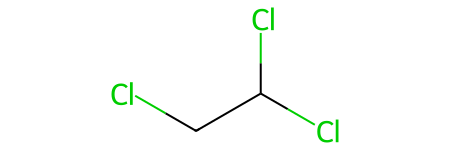

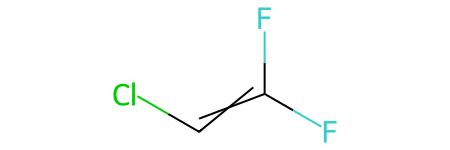

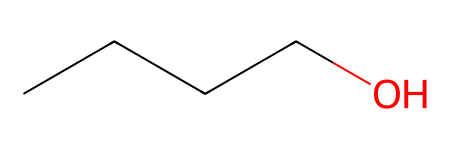

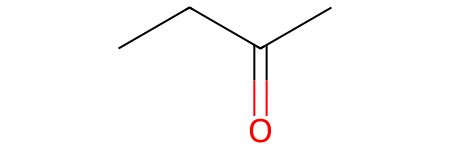

In [51]:
for i in range(7):
    display(standardize_molecules[i])

У  пятой молекулы после стандартизации разошлась двойная связь: такую молекулу нужно удалить, либо изменить протокол стандартизации

In [52]:
molecules_data = Chem.SDMolSupplier("data/DataCuration.sdf")

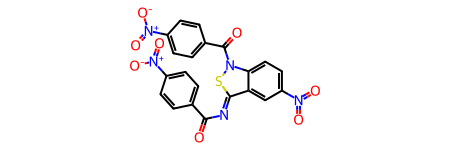

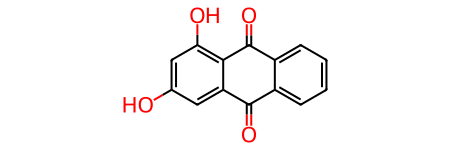

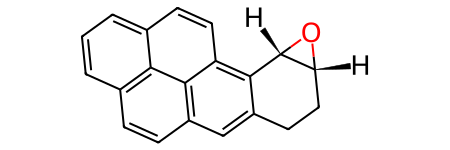

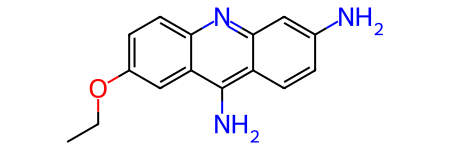

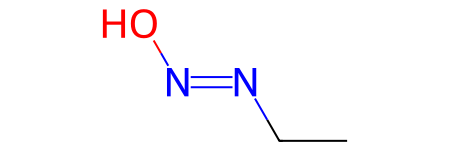

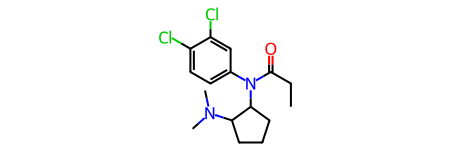

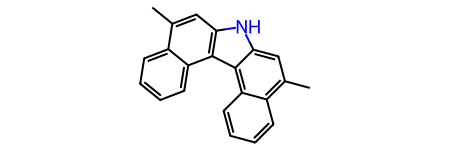

In [53]:
for i in range(7):
    display(molecules_data[i])

In [54]:
standardize_molecules_data = Chem.SDMolSupplier("standardized_DataCuration.sdf")

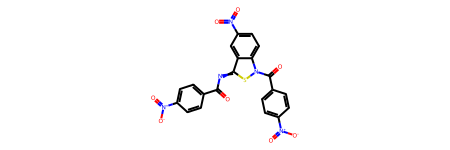

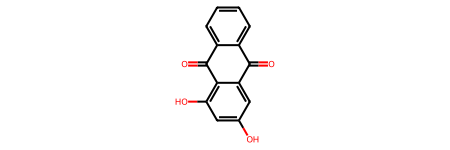

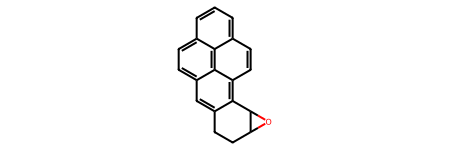

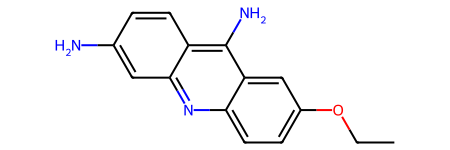

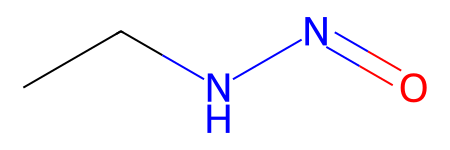

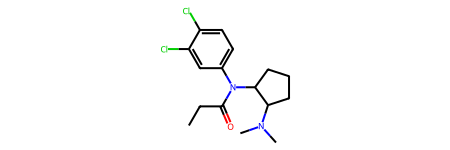

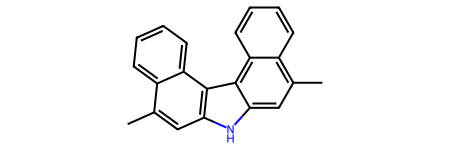

In [55]:
for i in range(7):
    display(standardize_molecules_data[i])